# Import ***Libraries***

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from datetime import datetime

################### Sklearn ####################################
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# ***Library configurations***

---



In [3]:
pd.options.mode.copy_on_write = True
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# ***Collecting Data***

---



In [4]:
from google.colab import files
uploaded = files.upload()

Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data.csv


In [7]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [8]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [9]:
data.drop(columns='id', inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [11]:
round(data.describe(include='all'), 2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110,5110.00,5110.0,5110.00,5110,5110,5110,5110.00,4909.00,5110,5110.00
unique,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,NaN,43.23,0.1,0.05,NaN,NaN,NaN,106.15,28.89,NaN,0.05
std,NaN,22.61,0.3,0.23,NaN,NaN,NaN,45.28,7.85,NaN,0.22
min,NaN,0.08,0.0,0.00,NaN,NaN,NaN,55.12,10.30,NaN,0.00
25%,NaN,25.00,0.0,0.00,NaN,NaN,NaN,77.24,23.50,NaN,0.00
50%,NaN,45.00,0.0,0.00,NaN,NaN,NaN,91.88,28.10,NaN,0.00
75%,NaN,61.00,0.0,0.00,NaN,NaN,NaN,114.09,33.10,NaN,0.00


# ***`Missing Values Handling`***

---



In [12]:
data.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [13]:
print((data.isna().sum()/len(data))*100)

gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64


In [14]:
data.dropna(how='any', inplace=True)



# ***`Visualization and Plots`***

---



In [15]:
cols = data.columns[:-1]
cols

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [16]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [17]:
numeric_columns = ['age', 'bmi', 'avg_glucose_level']
categorical_columns = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']

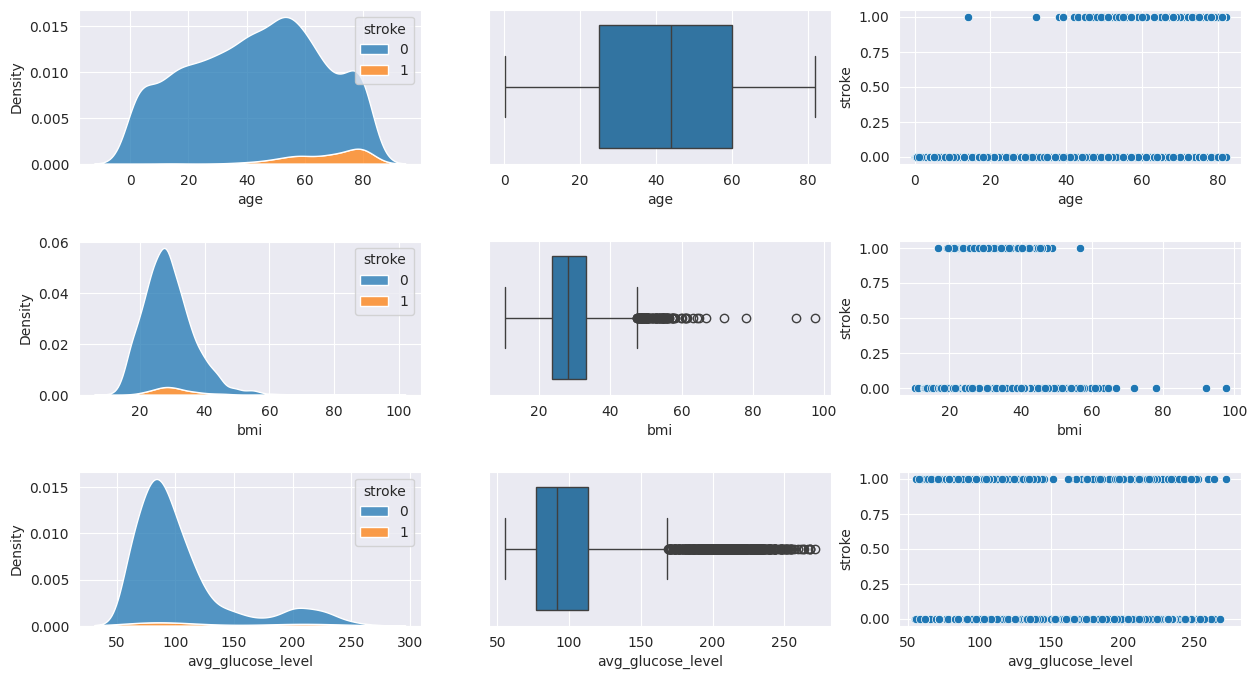

In [18]:
i = 0
fig, ax = plt.subplots(3, 3, figsize=(15, 8))
plt.subplots_adjust(hspace = 0.5)
for num_col in numeric_columns :
    sns.kdeplot(x=num_col, hue='stroke', data=data, multiple='stack', ax=ax[i,0])
    sns.boxplot(x=num_col, data=data, ax=ax[i, 1])
    sns.scatterplot(x=num_col, y='stroke', data=data, ax=ax[i, 2])
    i+=1
plt.show()

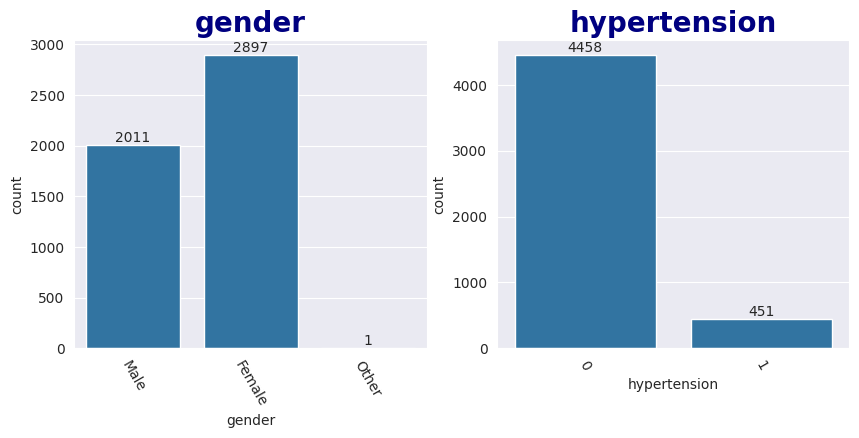

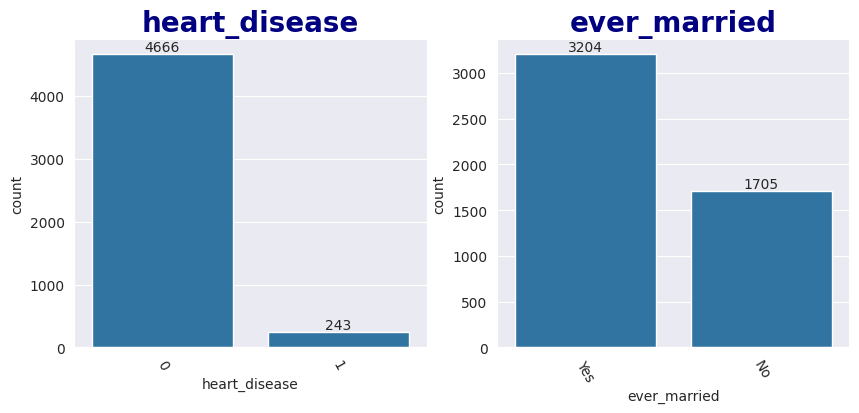

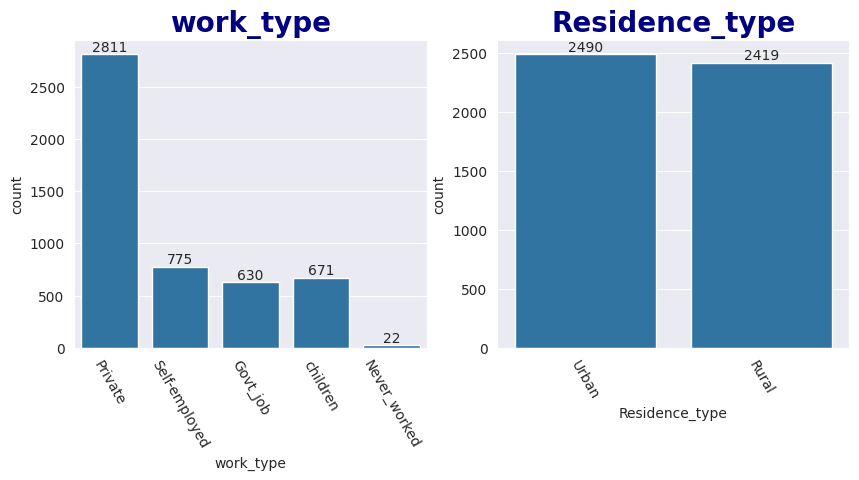

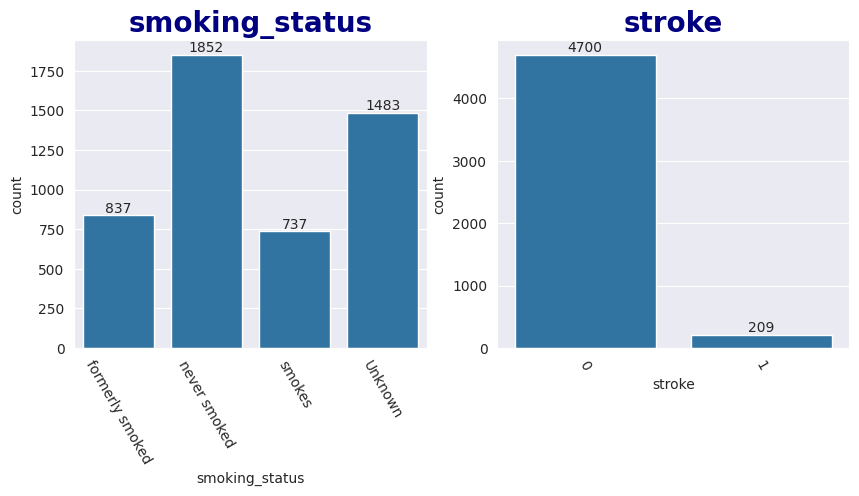

In [19]:
i=0
while i<8 :

    # Left AX
    fig = plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.title(categorical_columns[i], size=20, weight='bold', color='navy')
    ax = sns.countplot(x=categorical_columns[i], data=data)
    ax.bar_label(ax.containers[0])
    ax.tick_params(axis='x', rotation=300)
    i+=1

    # Right AX
    plt.subplot(1, 2, 2)
    plt.title(categorical_columns[i], size=20, weight='bold', color='navy')
    ax = sns.countplot(x=categorical_columns[i], data=data)
    ax.bar_label(ax.containers[0])
    ax.tick_params(axis='x', rotation=300)
    i+=1
    plt.show()

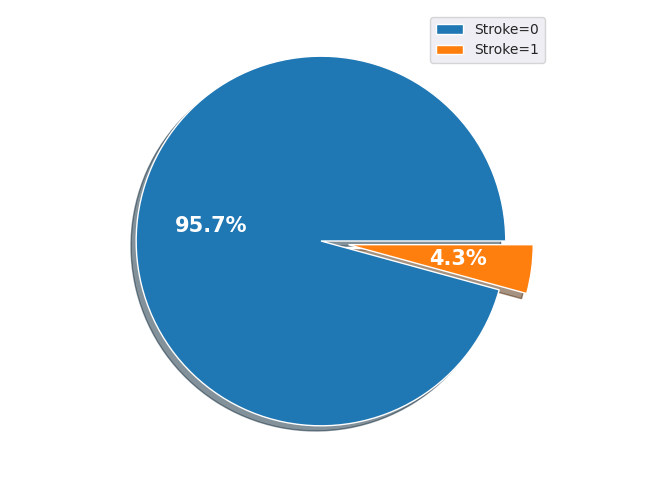

In [20]:
x = data['stroke'].value_counts()


explode = [0, 0.15]
labels = ['Stroke=0', 'Stroke=1']
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))

plt.pie(x, explode=explode, shadow=True, autopct='%1.1f%%', labels=labels, textprops=dict(color="w", weight='bold', size=15))
plt.legend()
plt.show()

# ***`Unique Values`***

---



In [21]:
columns_temp = ['gender', 'ever_married', 'work_type', 'smoking_status', 'Residence_type']

for col in columns_temp :
    print('column :', col)
    for index, unique in enumerate(data[col].unique()) :
        print(unique, ':', index)
    print('_'*45)

column : gender
Male : 0
Female : 1
Other : 2
_____________________________________________
column : ever_married
Yes : 0
No : 1
_____________________________________________
column : work_type
Private : 0
Self-employed : 1
Govt_job : 2
children : 3
Never_worked : 4
_____________________________________________
column : smoking_status
formerly smoked : 0
never smoked : 1
smokes : 2
Unknown : 3
_____________________________________________
column : Residence_type
Urban : 0
Rural : 1
_____________________________________________


In [22]:
# gender
data_2 = data.replace(
    {'gender' : {'Male' : 0, 'Female' : 1, 'Other' : 2}}
)

# ever_married
data_2 =  data_2.replace(
    {'ever_married' : {'Yes' : 0, 'No' : 1}}
)

# work_type
data_2 =  data_2.replace(
    {'work_type' : {'Private' : 0, 'Self-employed' : 1, 'Govt_job' : 2, 'children' : 3, 'Never_worked' : 4}}
)

# smoking_status
data_2 =  data_2.replace(
    {'smoking_status' : {'formerly smoked' : 0, 'never smoked' : 1, 'smokes' : 2, 'Unknown' : 3}}
)

# Residence_type
data_2 =  data_2.replace(
    {'Residence_type' : {'Urban' : 0, 'Rural' : 1}}
)

In [23]:
data_2.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,0,0,0,228.69,36.6,0,1
2,0,80.0,0,1,0,0,1,105.92,32.5,1,1
3,1,49.0,0,0,0,0,0,171.23,34.4,2,1
4,1,79.0,1,0,0,1,1,174.12,24.0,1,1
5,0,81.0,0,0,0,0,0,186.21,29.0,0,1


# **`Normalization`**

---



In [24]:
X_temp = data_2.drop(columns='stroke')
y = data_2.stroke

In [25]:
scaler = MinMaxScaler().fit_transform(X_temp)
X = pd.DataFrame(scaler, columns=X_temp.columns)
X.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,0.295274,0.522282,0.091872,0.049501,0.347321,0.210634,0.492768,0.231674,0.212981,0.527942
std,0.246098,0.275331,0.288875,0.216934,0.476167,0.281014,0.499999,0.205080,0.089966,0.363382
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.304199,0.000000,0.000000,0.000000,0.000000,0.000000,0.101330,0.151203,0.333333
50%,0.500000,0.536133,0.000000,0.000000,0.000000,0.000000,0.000000,0.168775,0.203895,0.333333
75%,0.500000,0.731445,0.000000,0.000000,1.000000,0.500000,1.000000,0.269827,0.261168,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# ***`Initialization`***

---



In [26]:
def plot_confusion_matrix(y_test, y_prediction):
    cm = metrics.confusion_matrix(y_test, y_prediction)
    ax = plt.subplot()
    ax = sns.heatmap(cm, annot=True, fmt='', cmap="Greens")
    ax.set_xlabel('Prediced labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['Dont Had Stroke', 'Had Stroke'])
    ax.yaxis.set_ticklabels(['Dont Had Stroke', 'Had Stroke'])
    plt.show()

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.25)

# ***`LogisticRegression`***

---



In [31]:
parameters = {
    'C' : [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
    'class_weight' : ['balanced'],
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

lr = LogisticRegression()
lr_cv = GridSearchCV(estimator=lr, param_grid=parameters, cv=10).fit(X_train, y_train)

print('Tuned hyper parameters : ', lr_cv.best_params_)
print('accuracy : ', lr_cv.best_score_)

Tuned hyper parameters :  {'C': 1.0, 'class_weight': 'balanced', 'solver': 'sag'}
accuracy :  0.7826757099092729


In [32]:

t1 = datetime.now()

lr = LogisticRegression(**lr_cv.best_params_).fit(X_train, y_train)

t2 = datetime.now()

In [33]:
y_pred_lr = lr.predict(X_test)

lr_score = round(lr.score(X_test, y_test), 3)
print('LogisticRegression score : ', lr_score)

LogisticRegression score :  0.357


In [34]:
delta = t2-t1
delta_lr = round(delta.total_seconds(), 3)
print('LogisticRegression takes : ', delta_lr, 'Seconds')

LogisticRegression takes :  0.245 Seconds


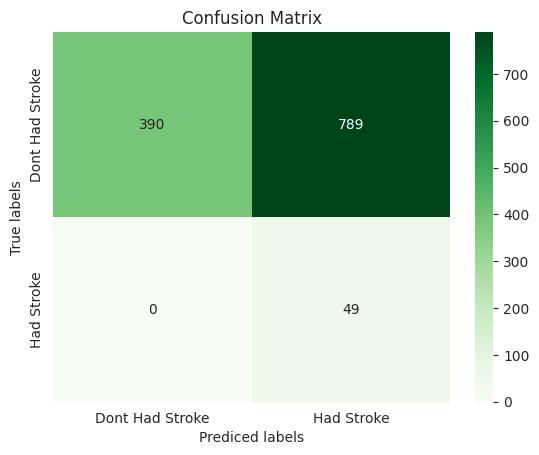

In [35]:
plot_confusion_matrix(y_test, y_pred_lr)

In [36]:
cr = metrics.classification_report(y_test, y_pred_lr)
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.33      0.50      1179
           1       0.06      1.00      0.11        49

    accuracy                           0.36      1228
   macro avg       0.53      0.67      0.30      1228
weighted avg       0.96      0.36      0.48      1228



# ***`KNeighborsClassifier`***

---



In [37]:
parameters = {
    'n_neighbors' : list(np.arange(3, 20, 2)),
    'p' : [1, 2, 3, 4]
}

# calculate time to run in second
t1 = datetime.now()

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(estimator=knn, cv=10, param_grid=parameters).fit(X_train, y_train)

t2 = datetime.now()

print('Tuned hyper parameters : ', knn_cv.best_params_)
print('accuracy : ', knn_cv.best_score_)

Tuned hyper parameters :  {'n_neighbors': 11, 'p': 1}
accuracy :  0.9565335218569577


In [38]:
t1 = datetime.now()
# Model :
knn = KNeighborsClassifier(**knn_cv.best_params_).fit(X_train, y_train)
# Calculate time after run algorithm :
t2 = datetime.now()

In [39]:
y_pred_knn = knn_cv.predict(X_test)

knn_score = round(knn.score(X_test, y_test), 3)
print('KNeighborsClassifier Score :', knn_score)

KNeighborsClassifier Score : 0.959


In [40]:
delta = t2-t1
delta_knn = round(delta.total_seconds(), 3)
print('KNeighborsClassifier takes : ', delta_knn, 'Seconds')

KNeighborsClassifier takes :  0.013 Seconds


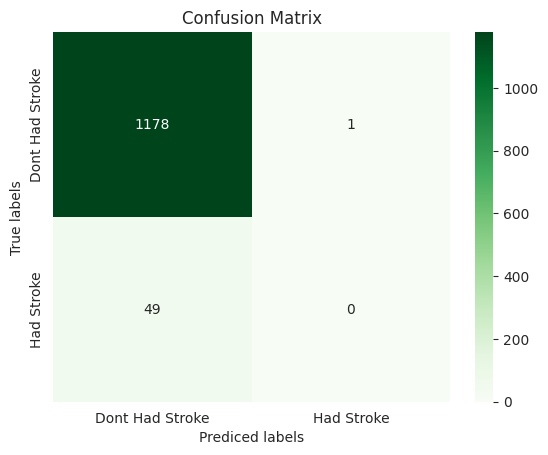

In [41]:
plot_confusion_matrix(y_test, y_pred_knn)